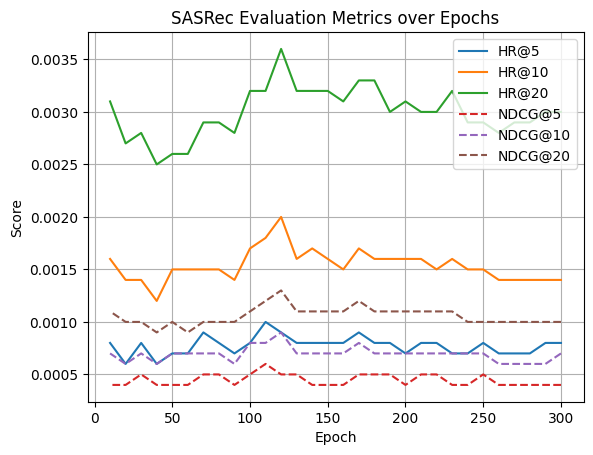

In [1]:
import matplotlib.pyplot as plt
import re

data = """
epoch_300 HR@5: 0.0008 HR@10: 0.0014 HR@20: 0.0030 NDCG@5: 0.0004 NDCG@10: 0.0007 NDCG@20: 0.0010
epoch_290 HR@5: 0.0008 HR@10: 0.0014 HR@20: 0.0030 NDCG@5: 0.0004 NDCG@10: 0.0006 NDCG@20: 0.0010
epoch_280 HR@5: 0.0007 HR@10: 0.0014 HR@20: 0.0029 NDCG@5: 0.0004 NDCG@10: 0.0006 NDCG@20: 0.0010
epoch_270 HR@5: 0.0007 HR@10: 0.0014 HR@20: 0.0029 NDCG@5: 0.0004 NDCG@10: 0.0006 NDCG@20: 0.0010
epoch_260 HR@5: 0.0007 HR@10: 0.0014 HR@20: 0.0028 NDCG@5: 0.0004 NDCG@10: 0.0006 NDCG@20: 0.0010
epoch_250 HR@5: 0.0008 HR@10: 0.0015 HR@20: 0.0029 NDCG@5: 0.0005 NDCG@10: 0.0007 NDCG@20: 0.0010
epoch_240 HR@5: 0.0007 HR@10: 0.0015 HR@20: 0.0029 NDCG@5: 0.0004 NDCG@10: 0.0007 NDCG@20: 0.0010
epoch_230 HR@5: 0.0007 HR@10: 0.0016 HR@20: 0.0032 NDCG@5: 0.0004 NDCG@10: 0.0007 NDCG@20: 0.0011
epoch_220 HR@5: 0.0008 HR@10: 0.0015 HR@20: 0.0030 NDCG@5: 0.0005 NDCG@10: 0.0007 NDCG@20: 0.0011
epoch_210 HR@5: 0.0008 HR@10: 0.0016 HR@20: 0.0030 NDCG@5: 0.0005 NDCG@10: 0.0007 NDCG@20: 0.0011
epoch_200 HR@5: 0.0007 HR@10: 0.0016 HR@20: 0.0031 NDCG@5: 0.0004 NDCG@10: 0.0007 NDCG@20: 0.0011
epoch_190 HR@5: 0.0008 HR@10: 0.0016 HR@20: 0.0030 NDCG@5: 0.0005 NDCG@10: 0.0007 NDCG@20: 0.0011
epoch_180 HR@5: 0.0008 HR@10: 0.0016 HR@20: 0.0033 NDCG@5: 0.0005 NDCG@10: 0.0007 NDCG@20: 0.0011
epoch_170 HR@5: 0.0009 HR@10: 0.0017 HR@20: 0.0033 NDCG@5: 0.0005 NDCG@10: 0.0008 NDCG@20: 0.0012
epoch_160 HR@5: 0.0008 HR@10: 0.0015 HR@20: 0.0031 NDCG@5: 0.0004 NDCG@10: 0.0007 NDCG@20: 0.0011
epoch_150 HR@5: 0.0008 HR@10: 0.0016 HR@20: 0.0032 NDCG@5: 0.0004 NDCG@10: 0.0007 NDCG@20: 0.0011
epoch_140 HR@5: 0.0008 HR@10: 0.0017 HR@20: 0.0032 NDCG@5: 0.0004 NDCG@10: 0.0007 NDCG@20: 0.0011
epoch_130 HR@5: 0.0008 HR@10: 0.0016 HR@20: 0.0032 NDCG@5: 0.0005 NDCG@10: 0.0007 NDCG@20: 0.0011
epoch_120 HR@5: 0.0009 HR@10: 0.0020 HR@20: 0.0036 NDCG@5: 0.0005 NDCG@10: 0.0009 NDCG@20: 0.0013
epoch_110 HR@5: 0.0010 HR@10: 0.0018 HR@20: 0.0032 NDCG@5: 0.0006 NDCG@10: 0.0008 NDCG@20: 0.0012
epoch_100 HR@5: 0.0008 HR@10: 0.0017 HR@20: 0.0032 NDCG@5: 0.0005 NDCG@10: 0.0008 NDCG@20: 0.0011
epoch_90 HR@5: 0.0007 HR@10: 0.0014 HR@20: 0.0028 NDCG@5: 0.0004 NDCG@10: 0.0006 NDCG@20: 0.0010
epoch_80 HR@5: 0.0008 HR@10: 0.0015 HR@20: 0.0029 NDCG@5: 0.0005 NDCG@10: 0.0007 NDCG@20: 0.0010
epoch_70 HR@5: 0.0009 HR@10: 0.0015 HR@20: 0.0029 NDCG@5: 0.0005 NDCG@10: 0.0007 NDCG@20: 0.0010
epoch_60 HR@5: 0.0007 HR@10: 0.0015 HR@20: 0.0026 NDCG@5: 0.0004 NDCG@10: 0.0007 NDCG@20: 0.0009
epoch_50 HR@5: 0.0007 HR@10: 0.0015 HR@20: 0.0026 NDCG@5: 0.0004 NDCG@10: 0.0007 NDCG@20: 0.0010
epoch_40 HR@5: 0.0006 HR@10: 0.0012 HR@20: 0.0025 NDCG@5: 0.0004 NDCG@10: 0.0006 NDCG@20: 0.0009
epoch_30 HR@5: 0.0008 HR@10: 0.0014 HR@20: 0.0028 NDCG@5: 0.0005 NDCG@10: 0.0007 NDCG@20: 0.0010
epoch_20 HR@5: 0.0006 HR@10: 0.0014 HR@20: 0.0027 NDCG@5: 0.0004 NDCG@10: 0.0006 NDCG@20: 0.0010
epoch_10 HR@5: 0.0008 HR@10: 0.0016 HR@20: 0.0031 NDCG@5: 0.0004 NDCG@10: 0.0007 NDCG@20: 0.0011
"""

pattern = r"epoch_(\d+).*?HR@5:\s([\d.]+).*?HR@10:\s([\d.]+).*?HR@20:\s([\d.]+).*?NDCG@5:\s([\d.]+).*?NDCG@10:\s([\d.]+).*?NDCG@20:\s([\d.]+)"
matches = re.findall(pattern, data, re.S)

epochs = [int(m[0]) for m in matches]
HR5 = [float(m[1]) for m in matches]
HR10 = [float(m[2]) for m in matches]
HR20 = [float(m[3]) for m in matches]
NDCG5 = [float(m[4]) for m in matches]
NDCG10 = [float(m[5]) for m in matches]
NDCG20 = [float(m[6]) for m in matches]

plt.plot(epochs, HR5, label="HR@5")
plt.plot(epochs, HR10, label="HR@10")
plt.plot(epochs, HR20, label="HR@20")
plt.plot(epochs, NDCG5, label="NDCG@5", linestyle="--")
plt.plot(epochs, NDCG10, label="NDCG@10", linestyle="--")
plt.plot(epochs, NDCG20, label="NDCG@20", linestyle="--")

plt.xlabel("Epoch")
plt.ylabel("Score")
plt.title("SASRec Evaluation Metrics over Epochs")
plt.legend()
plt.grid(True)
plt.show()

